daten von disk laden

In [7]:
from keras.src.utils import image_dataset_from_directory

data = image_dataset_from_directory(
        r"data\images",
        labels="inferred",
        label_mode="int",
        color_mode="rgb",
        batch_size=64,
        image_size=(512, 512),
        shuffle=True,
        interpolation="bilinear",
        crop_to_aspect_ratio=False,
        pad_to_aspect_ratio=True,
        verbose=False,
    )
data.class_names

['n02132136',
 'n02133161',
 'n02134084',
 'n02134418',
 'n02509815',
 'n02510455',
 'n04399382']

data augmentation

In [8]:
from keras.src.utils import to_categorical
from keras.src.layers import RandomFlip, RandomContrast, RandomBrightness
from keras import Sequential

preprocessing_layer = Sequential([
        RandomFlip("horizontal_and_vertical"),
        RandomContrast(0.2),
        RandomBrightness(0.2),
])

data = data.map(lambda x, y: (preprocessing_layer(x), to_categorical(y, num_classes=7)))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

plot data

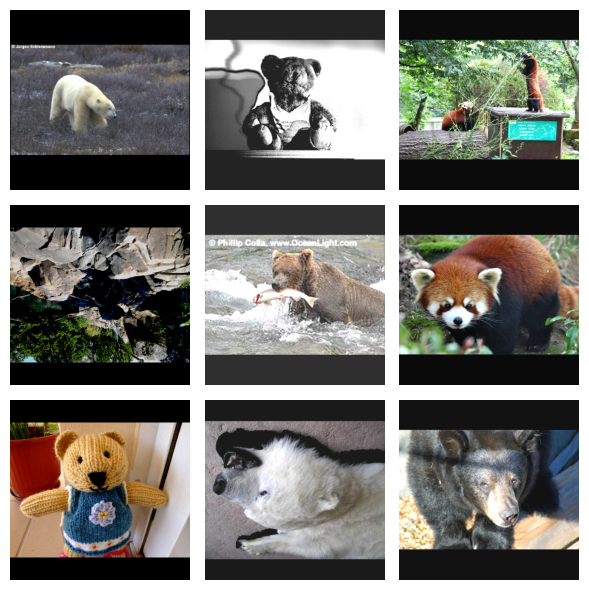

In [9]:
from keras_cv.src.visualization import plot_image_gallery

batch = next(iter(data.take(1)))
images, labels = batch
plot_image_gallery(
    batch[0],
    rows=3,
    cols=3,
    value_range=(0, 255),
    show=True,
)

train cnn

In [10]:
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(512, 512, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation="relu", input_shape=(512, 512, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3, 3), activation="relu", input_shape=(512, 512, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(7, activation='softmax'),
])
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │     3,444,231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,537,479 (13.49 MB)

 Trainable params: 3,537,479 (13.49 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(
    data,
    epochs=100,
)

Epoch 1/100
  8/143 ━━━━━━━━━━━━━━━━━━━━ 8:09 4s/step - accuracy: 0.1808 - loss: 784.0140

KeyboardInterrupt: 

In [12]:
from keras.src.optimizers import SGD
from keras_cv.src.models import ImageClassifier

model = ImageClassifier.from_preset(
    "resnet50_imagenet", num_classes=7
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
model.fit(data)

100%|██████████| 777/777 [00:00<?, ?B/s] 
100%|██████████| 90.3M/90.3M [00:03<00:00, 26.0MB/s]


  3/143 ━━━━━━━━━━━━━━━━━━━━ 1:12:05 31s/step - accuracy: 0.1840 - loss: 2.0132

KeyboardInterrupt: 